In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
df.shape

(397, 6)

In [4]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [8]:
df['discipline'] = df['discipline'].replace(['B','A'],[0,1])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,0,19,18,Male,139750
1,Prof,0,20,16,Male,173200
2,AsstProf,0,4,3,Male,79750
3,Prof,0,45,39,Male,115000
4,Prof,0,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,1,33,30,Male,103106
393,Prof,1,31,19,Male,150564
394,Prof,1,42,25,Male,101738
395,Prof,1,25,15,Male,95329


In [9]:
df['sex'] = df['sex'].replace(['Male','Female'],[1,0])

In [10]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,0,19,18,1,139750
1,Prof,0,20,16,1,173200
2,AsstProf,0,4,3,1,79750
3,Prof,0,45,39,1,115000
4,Prof,0,40,41,1,141500
...,...,...,...,...,...,...
392,Prof,1,33,30,1,103106
393,Prof,1,31,19,1,150564
394,Prof,1,42,25,1,101738
395,Prof,1,25,15,1,95329


In [19]:
df['rank'] = df['rank'].replace(['Prof','AsstProf','AssocProf'],[1,0,0])
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,0,19,18,1,139750
1,1,0,20,16,1,173200
2,0,0,4,3,1,79750
3,1,0,45,39,1,115000
4,1,0,40,41,1,141500


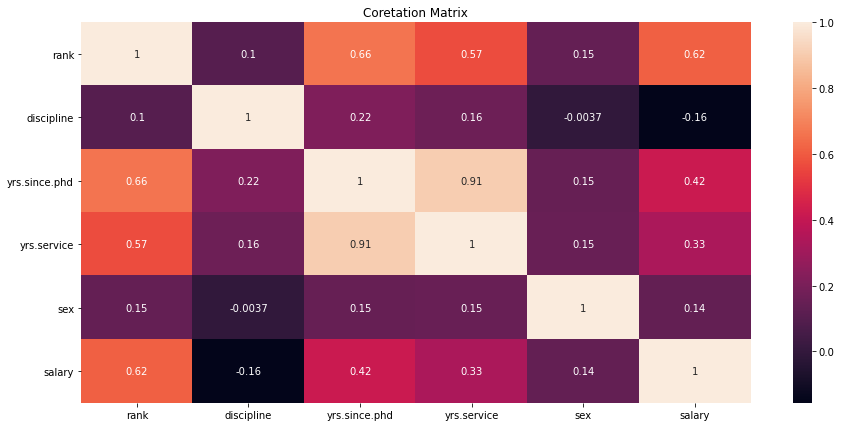

In [20]:
corr_mat = df.corr()

plt.figure(figsize=[15,7])
sns.heatmap(corr_mat,annot=True)
plt.title("Coretation Matrix")
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int64
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int64(6)
memory usage: 18.7 KB


For discipline and sex corelation is found minimum hence this columns are dropped

In [22]:
df=df.drop(["discipline","sex"],axis=1)

In [23]:
df

,rank,yrs.since.phd,yrs.service,salary
0,1,19,18,139750
1,1,20,16,173200
2,0,4,3,79750
3,1,45,39,115000
4,1,40,41,141500
...,...,...,...,...
392,1,33,30,103106
393,1,31,19,150564
394,1,42,25,101738
395,1,25,15,95329


In [24]:
corr_matrix = df.corr()
corr_matrix

,rank,yrs.since.phd,yrs.service,salary
rank,1.000000,0.662719,0.570572,0.615458
yrs.since.phd,0.662719,1.000000,0.909649,0.419231
yrs.service,0.570572,0.909649,1.000000,0.334745
salary,0.615458,0.419231,0.334745,1.000000


In [26]:
corr_matrix=df.corr()
corr_matrix['salary'].sort_values(ascending=False)

salary           1.000000
rank             0.615458
yrs.since.phd    0.419231
yrs.service      0.334745
Name: salary, dtype: float64

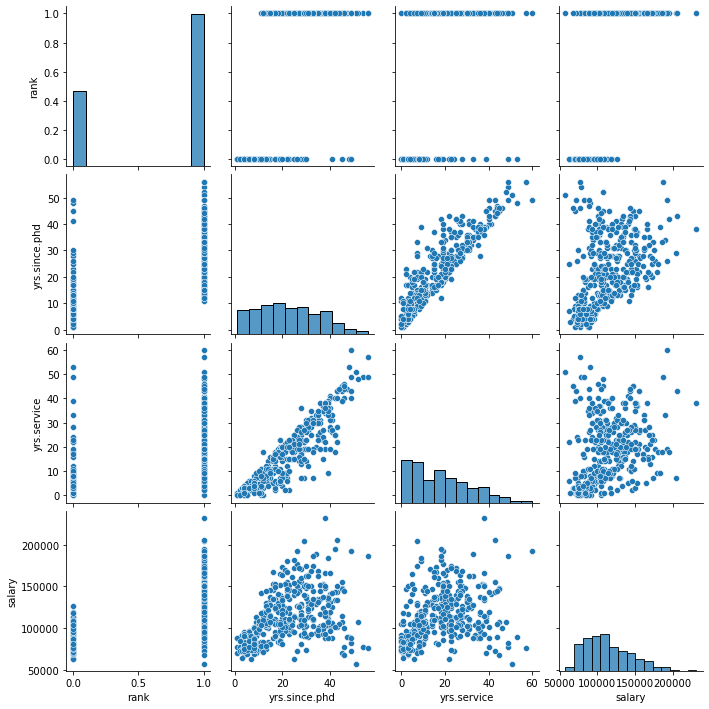

In [28]:
sns.pairplot(df)

In [30]:
df.skew()

rank            -0.725944
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Removing outliers

In [31]:
from scipy.stats import zscore
import numpy as np

In [32]:
z=np.abs(zscore(df))
z.shape

(397, 4)

In [33]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [34]:
df.drop([43, 131, 330, 364],axis=0)

,rank,yrs.since.phd,yrs.service,salary
0,1,19,18,139750
1,1,20,16,173200
2,0,4,3,79750
3,1,45,39,115000
4,1,40,41,141500
...,...,...,...,...
392,1,33,30,103106
393,1,31,19,150564
394,1,42,25,101738
395,1,25,15,95329


In [35]:
df.skew()

rank            -0.725944
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [36]:
x=df.drop("salary",axis=1)
y=df["salary"]

In [37]:
x.skew()

rank            -0.725944
yrs.since.phd    0.300880
yrs.service      0.650569
dtype: float64

In [40]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x.skew()

rank            -0.725944
yrs.since.phd   -0.132757
yrs.service     -0.122152
dtype: float64

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2, random_state = 41)

In [52]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [53]:
print(f"Regression R2: {model.score(x_test, y_test)}")

Regression R2: 0.345204792647572


In [55]:
maxAcc=0
maxRS=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf=LR.predict(x_test)

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

Accuracy 2.5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       70700       0.00      0.00      0.00         1
       72300       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         0
       73300       0.00      0.00      0.00         1
       73877       0.00      0.00      0.00         1
       74000       0.00      0.00      0.00         0
       75996       0.00      0.00      0.00         1
       77700       0.00      0.00      0.00         1
       79800       0.00      0.00      0.00         1
       81800       0.00      0.00      0.00         1
       82100       0.00      0.00      0.00         1
       83900       0.00      0.00      0.00         1
       84240       0.00      0.00      0.00         1
       88175       0.00      0.00      0.00         1
       88400       0.00      0.00      0.00         1
  

Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x,y, cv=5)
print(scr.mean())

0.3347637434602103


In [60]:
scr=cross_val_score(svc, x,y, cv=5)
print(scr.mean())

0.020189873417721518
